# Importing Required Libraries

In [6]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Reading data

In [7]:
x_train = np.genfromtxt('x_train.csv', delimiter = ',')[1:, 1:]
x_validate = np.genfromtxt('x_validate.csv', delimiter = ',')[1:, 1:]
x_test = np.genfromtxt('x_test.csv', delimiter = ',')[1:, 1:]

In [8]:
y_train = np.genfromtxt('y_train.csv', delimiter = ',')[1:, 1:]
y_train = y_train.reshape(y_train.shape[0])

y_test = np.genfromtxt('y_test.csv', delimiter = ',')[1:, 1:]
y_test = y_test.reshape(y_test.shape[0])

y_validate = np.genfromtxt('y_validate.csv', delimiter = ',')[1:, 1:]
y_validate = y_validate.reshape(y_validate.shape[0])

## Base Line Model (Without Optimization)

In [4]:
model = RandomForestClassifier(random_state = 0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [5]:
print(classification_report(y_test, y_pred))
print("\nAccuracy Score : ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       879
         2.0       0.99      1.00      0.99       888
         3.0       0.98      1.00      0.99       878
         4.0       0.93      0.93      0.93       897
         5.0       1.00      1.00      1.00       874
         6.0       0.96      0.97      0.96       883
         7.0       0.94      0.92      0.93       898
         8.0       1.00      0.99      0.99       843

    accuracy                           0.97      7040
   macro avg       0.97      0.97      0.97      7040
weighted avg       0.97      0.97      0.97      7040


Accuracy Score :  0.9744318181818182


## Parameter Tuning

### Effect of Cost Complexity Pruning on accuracy

In [6]:
ccp_alphas = np.logspace(-4, -1, 10)
acc_train = list()
acc_validate = list()

In [7]:
for ccp_alpha in ccp_alphas:
    print("ccp_alpha : ", ccp_alpha)
    clf = RandomForestClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    clf.fit(x_train, y_train)
    y_p = clf.predict(x_validate)
    y_p_tr = clf.predict(x_train)
    acc_validate.append(accuracy_score(y_validate, y_p))
    acc_train.append(accuracy_score(y_train, y_p_tr))

ccp_alpha :  0.0001
ccp_alpha :  0.00021544346900318845
ccp_alpha :  0.00046415888336127773
ccp_alpha :  0.001
ccp_alpha :  0.002154434690031882
ccp_alpha :  0.004641588833612777
ccp_alpha :  0.01
ccp_alpha :  0.021544346900318822
ccp_alpha :  0.046415888336127774
ccp_alpha :  0.1


In [8]:
print(acc_validate)
print('\n')
print(acc_train)

[0.9715909090909091, 0.9707386363636363, 0.9683238636363637, 0.9616477272727273, 0.9515625, 0.9291193181818181, 0.8981534090909091, 0.8482954545454545, 0.7720170454545454, 0.36832386363636366]


[0.999342637540453, 0.9963086569579288, 0.9894316343042071, 0.9788127022653722, 0.9638956310679612, 0.938915857605178, 0.9054409385113269, 0.8513855177993528, 0.7694174757281553, 0.3636731391585761]


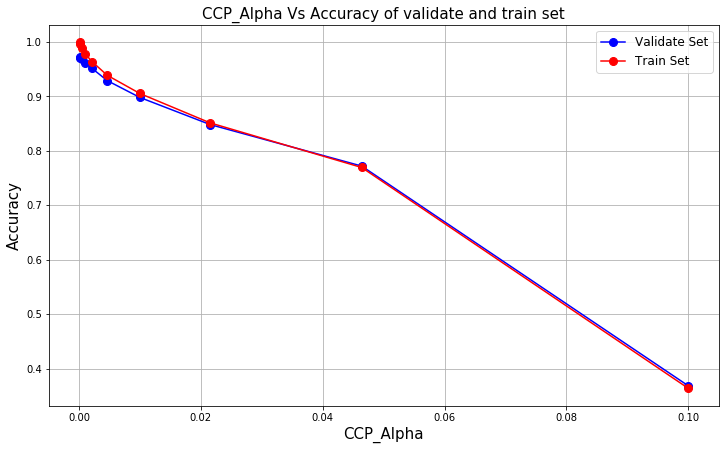

In [9]:
fig, ax = plt.subplots(figsize = (12, 7))
ax.plot(ccp_alphas, acc_validate, marker = 'o', markersize = 8, color = 'blue', label = 'Validate Set')
ax.plot(ccp_alphas, acc_train, marker = 'o', markersize = 8, color = 'red', label = 'Train Set')
ax.set_xlabel('CCP_Alpha', fontsize = 15)
ax.set_ylabel('Accuracy', fontsize = 15)
ax.set_title('CCP_Alpha Vs Accuracy of validate and train set', fontsize = 15)
plt.grid()
ax.legend(prop = {'size' : 12})
plt.show()

### Effect of number of Trees on Accuracy

In [15]:
n_estimator_list = [i for i in range(100, 1000, 100)]
train_acc = list()
validate_acc = list()

In [16]:
for i in n_estimator_list:
    print(i, end = ", ")
    clf = RandomForestClassifier(random_state = 0, n_estimators = i)
    clf.fit(x_train, y_train)
    y_pred_train = clf.predict(x_train)
    y_pred_val = clf.predict(x_validate)
    train_acc.append(accuracy_score(y_train, y_pred_train))
    validate_acc.append(accuracy_score(y_validate, y_pred_val))

100, 200, 300, 400, 500, 600, 700, 800, 900, 

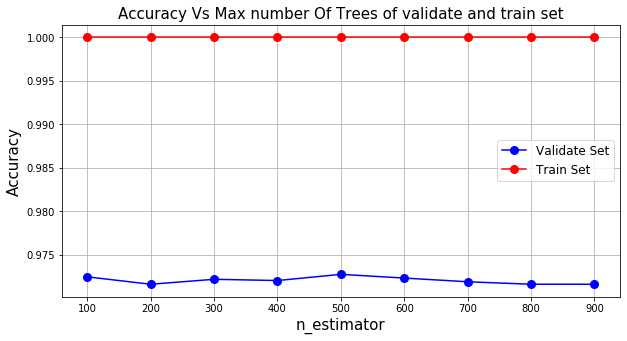

In [22]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(n_estimator_list, validate_acc, marker = 'o', markersize = 8, color = 'blue', label = 'Validate Set')
ax.plot(n_estimator_list, train_acc, marker = 'o', markersize = 8, color = 'red', label = 'Train Set')
ax.set_xlabel('n_estimator', fontsize = 15)
ax.set_ylabel('Accuracy', fontsize = 15)
ax.set_title('Accuracy Vs Max number Of Trees of validate and train set', fontsize = 15)
plt.grid()
ax.legend(prop = {'size' : 12})
plt.show()

### Effect of Max depth on accuracy

In [36]:
max_depths = [i for i in range(50, 1000, 50)]
val_Acc = list()
train_Acc = list()
for i in max_depths:
    print("Max Depth :", i, end = ',   ')
    clf = RandomForestClassifier(random_state = 0, max_depth = i)
    clf.fit(x_train, y_train)
    y_pred_val = clf.predict(x_validate)
    y_pred_train = clf.predict(x_train)
    val_Acc.append(accuracy_score(y_validate, y_pred_val))
    train_Acc.append(accuracy_score(y_train, y_pred_train))

Max Depth : 50,   Max Depth : 100,   Max Depth : 150,   Max Depth : 200,   Max Depth : 250,   Max Depth : 300,   Max Depth : 350,   Max Depth : 400,   Max Depth : 450,   Max Depth : 500,   Max Depth : 550,   Max Depth : 600,   Max Depth : 650,   Max Depth : 700,   Max Depth : 750,   Max Depth : 800,   Max Depth : 850,   Max Depth : 900,   Max Depth : 950,   

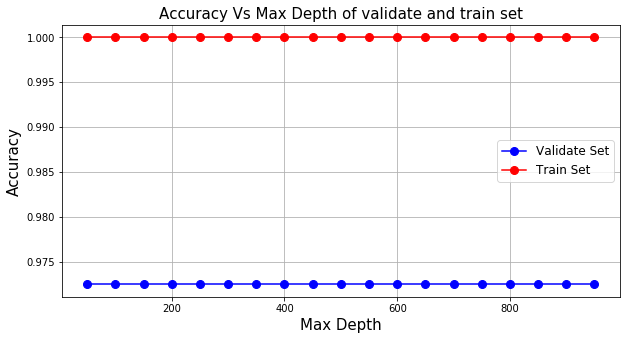

In [35]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(max_depths, val_Acc, marker = 'o', markersize = 8, color = 'blue', label = 'Validate Set')
ax.plot(max_depths, train_Acc, marker = 'o', markersize = 8, color = 'red', label = 'Train Set')
ax.set_xlabel('Max Depth', fontsize = 15)
ax.set_ylabel('Accuracy', fontsize = 15)
ax.set_title('Accuracy Vs Max Depth of validate and train set', fontsize = 15)
plt.grid()
ax.legend(prop = {'size' : 12})
plt.show()

In [37]:
# So it is clear that max depth is not affecting the accuracy of the model